# Coffee Shop Market in Ukraine

An analysis of the coffee shop market in Ukraine. We'll see if there's any interesting patterns in the data.

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/coffee_shops.csv')

In [2]:
df.head(10)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,NaN,NaN,NaN
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,NaN,NaN,True
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,NaN,True,True
5,Mariupol,Racers Coffee Shop,Espresso bar,4.6,367.0,$$,False,True,True
6,Mariupol,Займемся Кофе,Coffee shop,4.6,200.0,$$,False,True,True
7,Mariupol,Кофейня Rit Rit,Coffee shop,4.6,292.0,$$,False,NaN,True
8,Mariupol,Кав'ярня My coffee,Coffee shop,4.8,31.0,NaN,NaN,True,True
9,Mariupol,LENЬ. Coffee & desserts.,Coffee shop,4.8,125.0,$$,True,True,True


Here we start by taking a first look into the data. It has a couple missing values so we have to clean them soon.
There's a region, a store type, the rating and reviews columns, the price category and the delivery options.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            122 non-null    object 
 6   Delivery option  129 non-null    object 
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: float64(2), object(7)
memory usage: 14.2+ KB


In [4]:
df.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


A summary statistics table to see if there's anything that jumps to the eye.

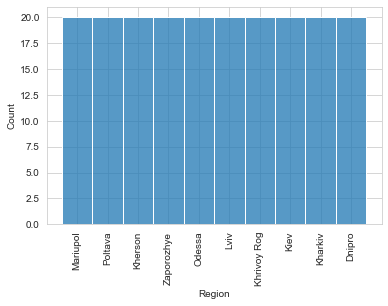

In [5]:
sns.set_style('whitegrid')
sns.histplot(x='Region', data=df)
plt.xticks(rotation=90)
plt.show()

We take a look at the Region column and see that it's uniformally distributed.

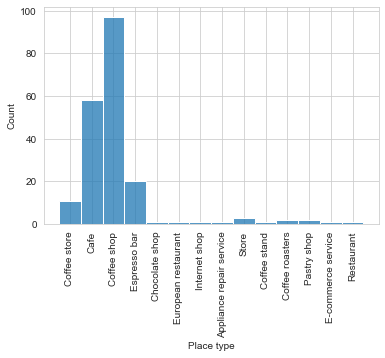

In [6]:
sns.histplot(x='Place type', data=df)
plt.xticks(rotation=90)
plt.show()

The most common shop type is the Coffee Shop, followed by Cafe and Espresso bar.

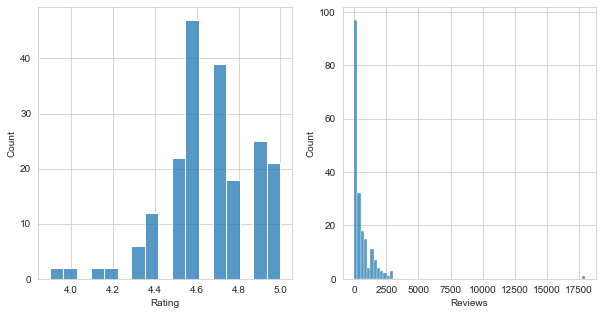

In [7]:
# plot the numeric features' histograms

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax1 = sns.histplot(x='Rating', data=df, ax=ax[0])
ax2 = sns.histplot(x='Reviews', data=df, ax=ax[1])

We plot the Rating and Reviews columns to see any trends. The Rating histogram seems to be mostly centered in the 4.6 range, while the Reviews seems to have an outlier with over 17000 reviews!

We're going to give the data some treatment before further analysis.

In [8]:
# create the categories
cats = ['Place type', 'Region', 'Price']
df[cats] = df[cats].astype('category')

print(df[cats].dtypes)

# cap the reviews max numbers into the max percentile to not drop the outlier value
percentiles = df.Reviews.quantile([0.05, 0.95]).values
df['Reviews'][df['Reviews'] >= percentiles[1]] = percentiles[1] 

# convert delivery, dine in and takeout option into boolean
# this will overwrite the NaNs into Trues, but that's a reasonable option
bools = ['Delivery option', 'Dine in option', 'Takeout option']

df[bools] = df[bools].astype(bool)
print(df[bools].dtypes)
df.Price = df.Price.cat.reorder_categories(['$$$', '$$', '$'])

# input some values into NaNs
df.Price.fillna('$$', inplace=True)
df.Reviews.fillna(df.Reviews.mean(), inplace=True)
df.Rating.fillna(df.Rating.mean(), inplace=True)

# reforce the ordering of the prices ascending
df.Price = df.Price.cat.reorder_categories(['$', '$$', '$$$'])

# create dummies
df_cat = df.drop('Place name', axis=1)
df_cat = pd.get_dummies(df_cat, prefix='dum')
df_cat.head()


Place type    category
Region        category
Price         category
dtype: object
Delivery option    bool
Dine in option     bool
Takeout option     bool
dtype: object


,Rating,Reviews,Delivery option,Dine in option,Takeout option,dum_Dnipro,dum_Kharkiv,dum_Kherson,dum_Khrivoy Rog,dum_Kiev,...,dum_E-commerce service,dum_Espresso bar,dum_European restaurant,dum_Internet shop,dum_Pastry shop,dum_Restaurant,dum_Store,dum_$,dum_$$,dum_$$$
0,4.6,206.0,True,True,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5.0,24.0,False,True,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5.0,11.0,True,True,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4.4,331.0,False,True,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.0,12.0,True,True,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# some more analysis before cleaning further treating 

df.groupby('Place type')['Rating', 'Reviews'].agg({'Rating' : 'mean', 'Reviews' : 'sum'})

,Rating,Reviews
Place type,,
Appliance repair service,5.000000,15.000000
Cafe,4.599373,30683.485859
Chocolate shop,4.600000,1376.000000
Coffee roasters,4.800000,1214.000000
Coffee shop,4.681068,51616.285859
Coffee stand,4.500000,167.000000
Coffee store,4.645455,3833.000000
E-commerce service,5.000000,21.000000
Espresso bar,4.690000,10519.000000


This is a table to see how the Rating and Reviews vary between different shop types. The ones that stand out are the Cafe and Coffee Shop types.

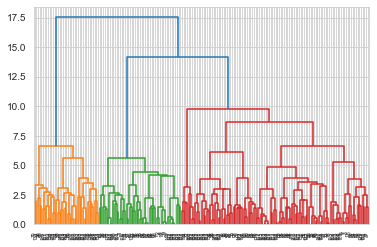

In [10]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import StandardScaler

features = ['Rating', 'Reviews']
scaler = StandardScaler()
df_cat[features] = scaler.fit_transform(df_cat[features])

dm = linkage(df_cat, method='ward', metric='euclidean')
dn = dendrogram(dm)
plt.show()

By using hierarchical clustering we found three segments of coffee shops by the data gathered. They were clustered together by each feature -Rating, Reviews, Price, etc.-

In [11]:
from scipy.cluster.hierarchy import cut_tree
clust = pd.Series(cut_tree(dm, n_clusters=3).reshape(-1,))

In [12]:
df_complete = pd.concat([df, clust], axis=1)
df_complete.rename(columns={0 : 'ClusterID'}, inplace=True)
df_complete.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option,ClusterID
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,$$,True,True,True,0
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,True,True,1
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,True,True,True,1
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True,0
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,True,True,True,1


We modify the data by inserting the clusters the model found. 

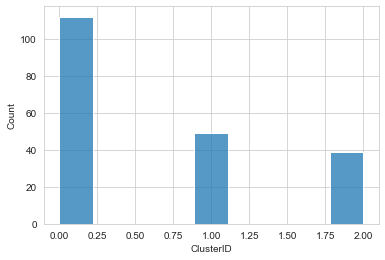

In [13]:
sns.histplot(x='ClusterID', data=df_complete)
plt.show()

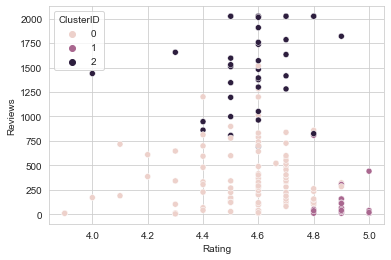

In [23]:
sns.scatterplot(x='Rating', y='Reviews', hue='ClusterID', data=df_complete)
plt.show()

This is a scatter plot of the Rating and Reviews to see how they are clustered by the model.

In [15]:
df_complete.groupby('ClusterID').agg({'Rating' : 'mean', 'Reviews' : 'sum', 'ClusterID' : 'count'})


,Rating,Reviews,ClusterID
ClusterID,,,
0,4.577029,40449.171717,112
1,4.924490,3441.000000,49
2,4.584615,60127.000000,39


The first cluster has a lot of reviews and a average rating of 4,57. The second one has an excellent rating, but little reviews to compensate. They could be newer shops or located in not so popular towns. The last one has about the same rating as the first. but has more reviews. They should be older shops or more popular ones located in the central region.

In [27]:
df_complete.groupby('Region').agg({'Rating' : 'mean', 'Reviews' : 'sum'})

,Rating,Reviews
Region,,
Dnipro,4.553182,11372.485859
Kharkiv,4.575000,9999.400000
Kherson,4.643182,7553.085859
Khrivoy Rog,4.600000,9238.000000
Kiev,4.785000,14997.400000
Lviv,4.670000,20829.000000
Mariupol,4.700000,3876.000000
Odessa,4.785000,7647.800000
Poltava,4.655000,10705.000000


In fact by controlling for region we see that Kiev is tied with Odessa for the highest average rating, but has double the reviews.

In [17]:
cluster0 = df_complete[df_complete.ClusterID == 0]
cluster1 = df_complete[df_complete.ClusterID == 1]
cluster2 = df_complete[df_complete.ClusterID == 2]

In [29]:
print('Price ranges for the first cluster')
cluster0.Price.value_counts()

Price ranges for the first cluster


$$     111
$$$      1
$        0
Name: Price, dtype: int64

In [30]:
print('Price ranges for the second cluster')
cluster1.Price.value_counts()

Price ranges for the second cluster


$$     49
$       0
$$$     0
Name: Price, dtype: int64

In [31]:
print('Price ranges for the third cluster')
cluster2.Price.value_counts()

Price ranges for the third cluster


$$     34
$$$     3
$       2
Name: Price, dtype: int64

The Price ranges for each cluster. The first one has only one expensive option while the rest is the accessible option. The second cluster has only acessible shops and the last cluster has three expensive shops and the two cheaper ones.

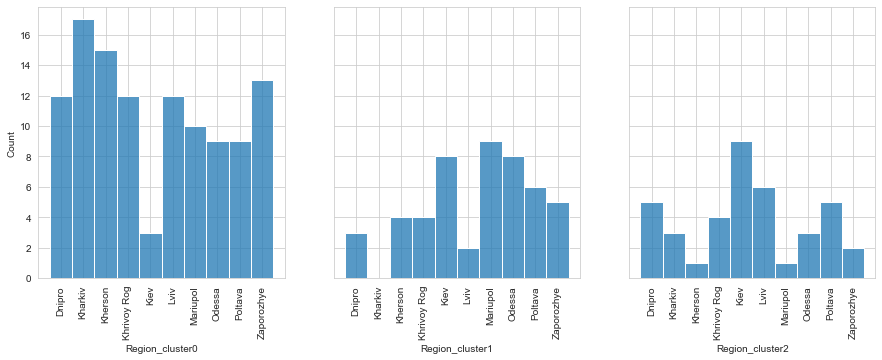

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey=True)
ax1 = sns.histplot(x='Region', data=cluster0, ax=ax[0])
ax2 = sns.histplot(x='Region', data=cluster1, ax=ax[1])
ax3 = sns.histplot(x='Region', data=cluster2, ax=ax[2])

cols = df_complete.Region.unique()
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)

ax[0].set_xlabel('Region_cluster0')
ax[1].set_xlabel('Region_cluster1')
ax[2].set_xlabel('Region_cluster2')
plt.show()


Region distribution by cluster. The first one is more spread throughout the country, while  the second and third seem to be centralized.

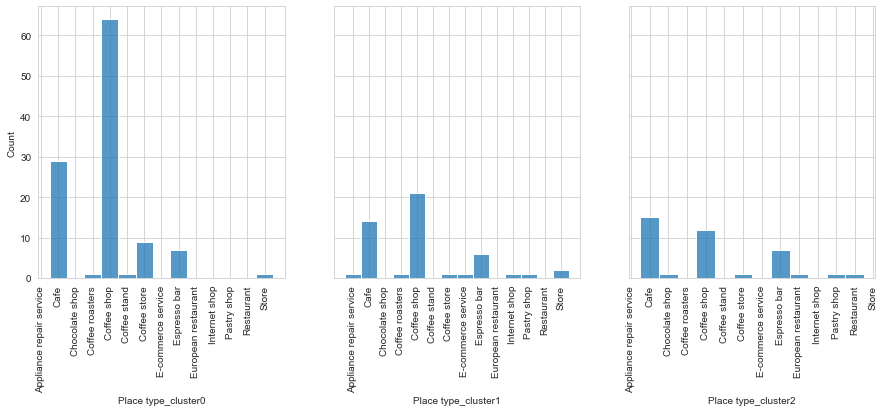

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey=True)
ax1 = sns.histplot(x='Place type', data=cluster0, ax=ax[0])
ax2 = sns.histplot(x='Place type', data=cluster1, ax=ax[1])
ax3 = sns.histplot(x='Place type', data=cluster2, ax=ax[2])

cols = df_complete.Region.unique()
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)

ax[0].set_xlabel('Place type_cluster0')
ax[1].set_xlabel('Place type_cluster1')
ax[2].set_xlabel('Place type_cluster2')
plt.show()

Shop type distribution by cluster. In the two first clusters the most common type is the Coffee Shop, but in the last one the Cafe is dominant.

The recomendations:

- There are at least 3 segments in the coffee shop market in Ukraine;
- They seem to be mostly segmented by the Rating received and the quantity of Reviews;
- The best rated Coffee Shops seem to be mostly from Kiev and Lviv;
- There are a lot of highly rated shops, but with little reviews. They could be new shops or in the countryside, where they shouldn't be popular;
- The last cluster also includes the  most expensive shops;
- We could aim for franchising in the cafes of the second cluster, since they seem to be most popular and the ones that aggregate more value.

What could be done better:

- See if there's a better method to cluster categorical variables;
- Gather more data;
- Use a more complex model to extract more info;
- Better NaN treatment.